In [ ]:
%matplotlib widget

from visual_kinematics.RobotSerial import *
from visual_kinematics.RobotTrajectory import *
import numpy as np
from math import pi

In [ ]:
def main():
    np.set_printoptions(precision=3, suppress=True)
    dh_params = np.array([[0.25, 0, pi/2, 0],
                          [0, 0.25, 0, 0],
                          [0, 0.25, 0, 0],
                          [0, 0.1, 0, 0],
                          [0, 0, -pi/2, pi/2]])

    robot = RobotSerial(dh_params)
    # =====================================
    # forward
    # =====================================

    theta = np.array([45, 0, 45, 45, 0])
    theta = np.deg2rad(theta)
    f = robot.forward(theta)

    print("-------forward-------")
    print("end frame t_4_4:")
    print(f.t_4_4)
    print("end frame xyz:")
    print(f.t_3_1.reshape([3, ]))
    print("end frame abc:")
    print(f.euler_3)
    print("end frame rotational matrix:")
    print(f.r_3_3)
    print("end frame quaternion:")
    print(f.q_4)
    print("end frame angle-axis:")
    print(f.r_3)

    robot.show()
    


if __name__ == "__main__":
    main()

In [ ]:
import numpy as np
from sympy import symbols, cos, sin, pi, simplify
from sympy.matrices import Matrix
from sympy import latex

# Define the symbols
th1, th2, th3, th4 = symbols('th1:5')

# Adjust the dh_params array to include the th values
dh_params = np.array([[0.25, 0, pi/2, th1],
                      [0, 0.25, 0, th2],
                      [0, 0.25, 0, th3],
                      [0, 0.1, 0, th4],
                      [0, 0, -pi/2, pi/2]])

# Function to calculate transformation matrix
def transformation_matrix(params):
    a, d, alpha, th = params
    S, C = sin, cos
    return Matrix([[C(th), -S(th)*C(alpha), S(th)*S(alpha), a*C(th)],
                   [S(th), C(th)*C(alpha), -C(th)*S(alpha), a*S(th)],
                   [0, S(alpha), C(alpha), d],
                   [0, 0, 0, 1]])

# Calculate T01, T12, T23, T34
T01 = transformation_matrix(dh_params[0])
T12 = transformation_matrix(dh_params[1])
T23 = transformation_matrix(dh_params[2])
T34 = transformation_matrix(dh_params[3])

# Calculate T04
T04 = simplify(T01 * T12 * T23 * T34)




# Print each transformation matrix in LaTeX format
print("T01 = \n" + latex(T01) + "\n")
print("T12 = \n" + latex(T12) + "\n")
print("T23 = \n" + latex(T23) + "\n")
print("T34 = \n" + latex(T34) + "\n")
print("T04 = \n" + latex(T04) + "\n")


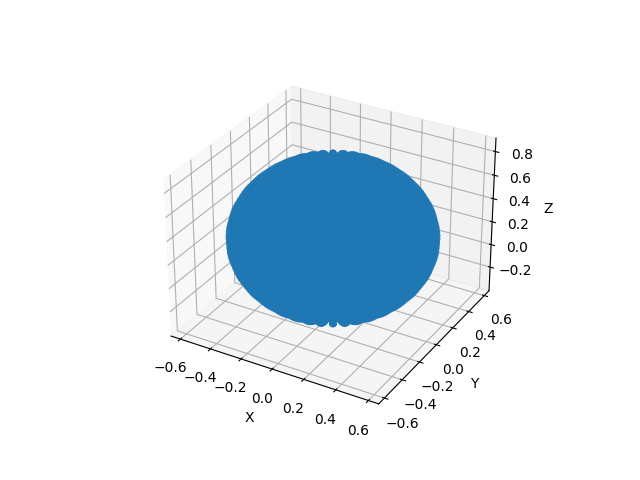

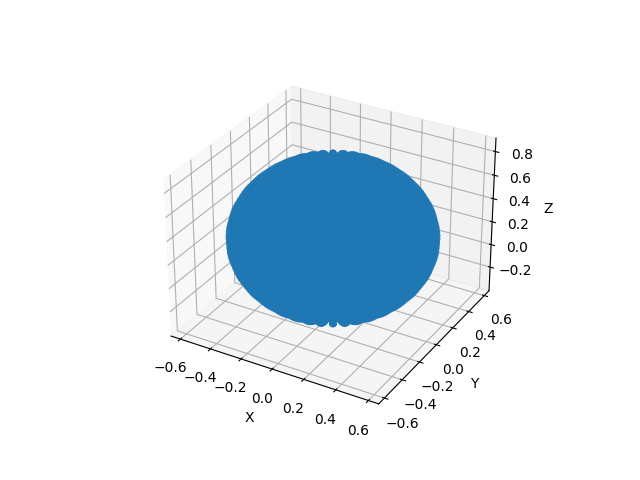

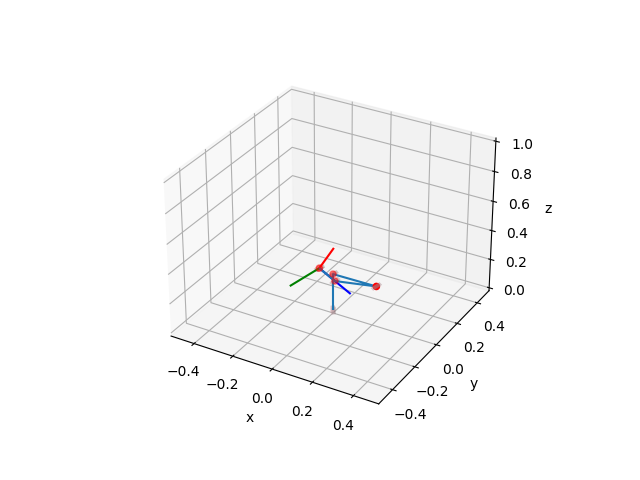

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def main():
    np.set_printoptions(precision=3, suppress=True)
    dh_params = np.array([[0.25, 0, np.pi/2, 0],
                          [0, 0.25, 0, 0],
                          [0, 0.25, 0, 0],
                          [0, 0.1, 0, 0],
                          [0, 0, -np.pi/2, np.pi/2]])

    robot = RobotSerial(dh_params)
    # =====================================
    # forward
    # =====================================

    # Initialize an empty list to store end frame positions
    positions = []

    # Create range of angles
    angles = np.arange(-180, 180, 10)  # from -180 to 180 with step size of 10

    for a in angles:
        for b in angles:
            for c in angles:
                theta = np.array([a, b, c, 45, 0])
                theta = np.deg2rad(theta)
                f = robot.forward(theta)

                # Append end frame position to positions list
                positions.append(f.t_3_1.reshape([3, ]))

    positions = np.array(positions)  # Convert list to numpy array

    # 3D Plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(positions[:, 0], positions[:, 1], positions[:, 2])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

    robot.show()

if __name__ == "__main__":
    main()
